## Websites

In [1]:
!pip install requests
!pip install beautifulsoup4


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Extracting text from website

In [3]:
import requests
from bs4 import BeautifulSoup

def extract_text_from_website(url):
    # Send a GET request to the website
    response = requests.get(url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract text from the parsed HTML
        extracted_text = soup.get_text()
        
        # Print or return the extracted text
        return extracted_text
    else:
        # If the request was not successful, print an error message
        print(f"Failed to retrieve content from {url}. Status code: {response.status_code}")
        return None

# Example usage
if __name__ == "__main__":
    # URL of the website you want to extract text from
    website_url = "https://www.gutenberg.org/cache/epub/1513/pg1513-images.html"
    
    # Call the function and print the extracted text
    extracted_text = extract_text_from_website(website_url)
    if extracted_text:
        print("Extracted Text:")
        print(extracted_text[:1000])  # Print the first 100 characters of the extracted text


Extracted Text:



The Project Gutenberg eBook of Romeo and Juliet, by William Shakespeare

























The Project Gutenberg eBook of Romeo and Juliet
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.
Title: Romeo and Juliet

Author: William Shakespeare

Release date: November 1, 1998 [eBook #1513]
                Most recently updated: June 27, 2023
Language: English

*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***




THE TRAGEDY OF ROMEO AND JULIET
by William Shakespeare


Contents


 THE PROLOGUE.


 ACT I


 Scene I. A public place.


 Scene II. A Street.


 Scene III.

## Extracting images

Downloaded: cover.jpg


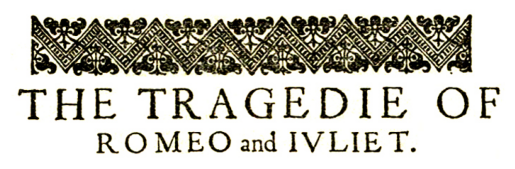

In [6]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from PIL import Image
import matplotlib.pyplot as plt

def extract_images_from_website(url, save_folder):
    # Send a GET request to the website
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all image tags in the parsed HTML
        img_tags = soup.find_all('img')
        
        # Extract image URLs and download them
        for img_tag in img_tags:
            img_url = urljoin(url, img_tag['src'])  # Create absolute image URL
            img_name = os.path.basename(img_url)    # Extract image file name
            img_path = os.path.join(save_folder, img_name)  # Create local file path
            
            # Download the image
            with open(img_path, 'wb') as img_file:
                img_file.write(requests.get(img_url).content)
                print(f"Downloaded: {img_name}")
        
        # Return the list of downloaded image file paths
        return img_path
    else:
        # If the request was not successful, print an error message
        print(f"Failed to retrieve content from {url}. Status code: {response.status_code}")

# Example usage
if __name__ == "__main__":
    # URL of the website you want to extract images from
    website_url = "https://www.gutenberg.org/cache/epub/1513/pg1513-images.html"
    
    # Folder to save the downloaded images
    save_folder = "Image"
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)  # Create the folder if it doesn't exist
    
    # Call the function to extract images from the website
    img_path = extract_images_from_website(website_url, save_folder)

    # Open the image using PIL and plot it
    image = Image.open(img_path).convert("RGB")

    # Plot the image
    plt.axis('off')
    plt.imshow(image)
    plt.show()


## Batch download pdfs from ArXiv

In [1]:
!pip install arxiv

  Obtaining dependency information for arxiv from https://files.pythonhosted.org/packages/e3/fb/ebc79ba50811878e25af80cd08dcdaae6c72edb8be17eecaaf2695e5cce7/arxiv-2.0.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/81.1 kB ? eta -:--:--
     ---------------------------------------- 81.1/81.1 kB ? eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6061 sha256=238227a837ce9eea84a410b9071af09da809fd563ae6895374f321b78373bdec
  Stored in directory: c:\users\kinla\appdata\local\pip\cache\wheels\f0\69\93\a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
import arxiv
import requests

# Set your search query and other parameters
query = "machine learning"  # Change this to your desired search query
max_results = 10  # Number of papers to download
output_folder = "arxiv_papers"  # Folder to save downloaded PDFs

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Search for papers on arXiv
papers = arxiv.query(query=query, max_results=max_results)

# Download PDFs
for paper in papers:
    pdf_url = paper.pdf_url
    paper_id = paper.entry_id.replace("/", "_")  # Replace slashes in paper ID
    pdf_filename = f"{paper_id}.pdf"
    pdf_path = os.path.join(output_folder, pdf_filename)

    # Download PDF file
    with open(pdf_path, "wb") as pdf_file:
        response = requests.get(pdf_url)
        pdf_file.write(response.content)
    
    print(f"Downloaded: {pdf_filename}")

print("Download complete.")
